In [15]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from mpl_toolkits.mplot3d import Axes3D
import time

from surface import Surface
from plot3d import PLOT3D
from domain import Domain
from wake import Wake
from constants import ModelParams
from solver import Solver

Reading surface data from cylinder.x
Mesh has 551 panels.
Mesh has 600 nodes.
Mesh has 551 panels.
Panel neighbours: 551


c:\Users\darsh\OneDrive\Desktop\sem-6\AE219\panel-methods\py3dVPM\src\plot3d.py:118: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.surf.panel_neighbours = np.array(panel_neighbours)


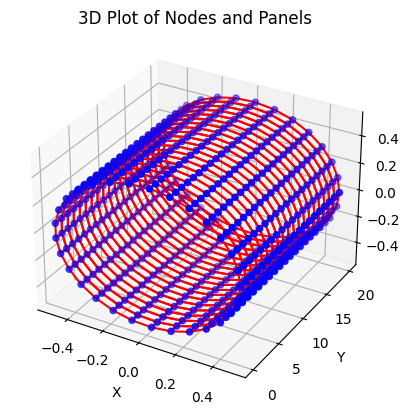

Instantaneous surface velocity =  [-1.  0.  0.]
ITERATION:  1
Computing source strengths...
Done.
Computing influence coeff. matrix ...


c:\Users\darsh\OneDrive\Desktop\sem-6\AE219\panel-methods\py3dVPM\src\surface.py:307: RuntimeWarning: divide by zero encountered in double_scalars
  m = (node_b[1] - node_a[1]) / (node_b[0] - node_a[0])


Done.
Applying Kutta condition...


c:\Users\darsh\OneDrive\Desktop\sem-6\AE219\panel-methods\py3dVPM\src\surface.py:254: RuntimeWarning: divide by zero encountered in double_scalars
  m = (node_b[1] - node_a[1]) / (node_b[0] - node_a[0])


Done.
Solving for unknown doublet strengths...
Solution converged in 551 iterations.
Computing surface velocities...
Done.
Computing pressure...
Done.
Added mass coefficient = -0.12424434039654708
Instantaneous surface velocity =  [-1.12  0.    0.  ]
ITERATION:  2
Computing source strengths...
Done.
Computing influence coeff. matrix ...
Done.
Applying Kutta condition...
Done.
Computing wake influence coeffs...
Done.
Solving for unknown doublet strengths...
Solution converged in 551 iterations.
Computing surface velocities...
Done.
Computing pressure...
Done.
Added mass coefficient = -0.9051766685864786
Program finished in 52.834004163742065 seconds.


In [16]:
ModelParams.unsteady_problem = True
ModelParams.trailing_edge_wake_shed_factor = 1.0
surface = Surface()

mesh = PLOT3D()
filename = 'cylinder.x'
mesh.set_surf(surface)
mesh.read_surface(filename)

print(f'Mesh has {len(mesh.surf.nodes)} nodes.')
print(f'Mesh has {len(mesh.surf.panels)} panels.')
print(f'Panel neighbours: {len(mesh.surf.panel_neighbours)}')

mesh.plot_geometry()

surface.rotate_surface(np.array([0, -5.0, 0.0]), 'deg')
time_step = 0.1
fluid_density = 1.225

free_stream_vel = np.zeros(3)
surf_vel = np.array([-1.0, 0.0, 0.0])
surface.set_linear_vel(surf_vel)

wake = Wake()
wake.add_lifting_surf(surface)
wake.init(free_stream_vel, time_step)

solver = Solver()
solver.add_surf(surface)
solver.add_wake(wake)
solver.set_fluid_density(fluid_density)

acceleration = np.array([1.2, 0, 0])
start_time = time.time()
for i in range(2):
    print("Instantaneous surface velocity = ", surf_vel)
    solver.set_ref_vel(surf_vel)
    solver.solve(time_step, i)
    surface.translate_surface(surf_vel * time_step)
    solver.convect_wake(time_step)
    wake.shed_wake(free_stream_vel, time_step)
    solver.finalize_iteration()
    surf_vel -= time_step * acceleration
    surface.set_linear_vel(surf_vel)
    print(f"Added mass coefficient = {solver.get_body_forces()[0] / acceleration[0]}")

end_time = time.time()
execution_time = end_time - start_time
print(f"Program finished in {execution_time} seconds.")

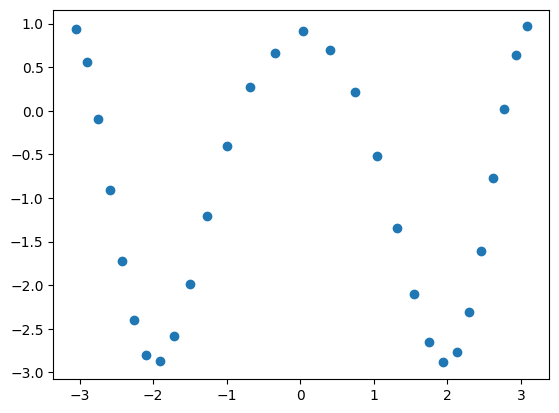

In [17]:
def calc_theta(point):
    return np.arctan2(point[2], point[0])

thetas = []
cp_values = []
n = surface.n_panels()

for i in range(261, 290):
    thetas.append(calc_theta(surface.get_cp(i)))
    cp_values.append(solver.pressure_coeffs[i])

plt.plot(thetas, cp_values, 'o')


In [66]:
# solver.doublet_strength.shape
# JM, IM, 3, blades
a = np.array([[[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]]], [[[4.0, 4.0], [5.0, 5.0], [6.0, 6.0]]], [[[7.0, 7.0], [8.0, 8.0], [9.0, 9.0]]]])
b = a[0, 0, :, 0]
b
solver.compute_total_vel(b)

array([ 0.00035049, -0.00935013, -0.01681693])

In [58]:
solver.compute_total_vel(b.reshape(3, 2).T)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 3)